# New York City AirBnB Data Analysis (2019 Data) 
Muhammad Taseer Qamar<br>
Vasanthan Sivarajan Thiruvadi<br>
Anthony Tolentino 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/taseer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Questions to answer

- What can we learn about different areas?
- What is the average price to book in New York?
- What is the average availability?
- What is the average price per neighbourhood?
- What is the average price per room type in each neighbourhood?
- Which neighbourhood/city had highest occupancy/availability?
- What is the average price of a private room vs entire home/apt vs shared room in New York?
- How many reviews does each type of room in each neighbourhood receive?
- What are the most common words included in the listing title?
- Are bookings impacted by price changes?
- Are bookings impacted by change in the number of reviews?
- Are bookings impacted by the availability of a listing throughout the year?

# Collecting Data

Data retrieved from: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [2]:
newyork = pd.read_csv('AB_NYC_2019.csv')

# Shape of Dataset

In [3]:
newyork.shape

(48895, 16)

# DataSet Overview

In [4]:
newyork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Finding Null Values

In [5]:
newyork.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#Data Enrichment

In [7]:
newyork['bookings_month'] = newyork.reviews_per_month*1.28
newyork['bookings_year'] = newyork.bookings_month*12

# Dropping Columns

In [8]:
#newyork.drop(['host_name', 'last_review', 'host_id'], axis=1, inplace= True)
newyork.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,bookings_month,bookings_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0.2688,3.2256
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.4864,5.8368
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,5.9392,71.2704
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0.1280,1.5360
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,0.7552,9.0624
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,0.5120,6.1440
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,4.4416,53.2992
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,1.2672,15.2064
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,1.7024,20.4288


# Recheck Data For Null Values

In [9]:
newyork.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
bookings_month                    10052
bookings_year                     10052
dtype: int64

# Answering Some Basic Analysis Questions

In [10]:
# Number of fields in our dataset
print("# of fields in our dataset: ", len(newyork.columns))

# Number of data points in our data
print("# of data points in our dataset: ", len(newyork))

# Number of listings by neighbourhood group
print("# of listings by neighbourhood group: ", newyork['neighbourhood_group'].value_counts())

# Number of max listing by the same host
print("# of max listings by the same host: ", newyork['calculated_host_listings_count'].max())

# Number of room types
print("# of different room types ", newyork['room_type'].value_counts())

# Number of unique hosts in the dataset
print("# of unique hosts: ", len(newyork['host_id'].unique()))

# Number of different neighbourhood
print("# of different neighbourhoods: ", len(newyork['neighbourhood'].unique()))




# of fields in our dataset:  18
# of data points in our dataset:  48895
# of listings by neighbourhood group:  Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64
# of max listings by the same host:  327
# of different room types  Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64
# of unique hosts:  37457
# of different neighbourhoods:  221


# Calculate Total Average Price/Percentile

In [11]:
newyork.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [12]:
newyork_price_average = round(newyork.price.mean(), 2)
print('The average price of an AirBnB listing in New York is ${}'.format(newyork_price_average))

The average price of an AirBnB listing in New York is $152.72


# Calculate Average Price Per Neighborhood

In [13]:
result = newyork.groupby("price").size()
result

price
0        11
10       17
11        3
12        4
13        1
         ..
7703      1
8000      1
8500      1
9999      3
10000     3
Length: 674, dtype: int64

In [14]:
bins = newyork.neighbourhood_group.unique()
bins

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [15]:
# Grouped neighbourhoods

grouped_neighbourhoods = newyork.groupby('neighbourhood_group')

brooklyn = grouped_neighbourhoods.get_group('Brooklyn')

manhattan = grouped_neighbourhoods.get_group('Manhattan')

queens = grouped_neighbourhoods.get_group('Queens')

staten_island = grouped_neighbourhoods.get_group('Staten Island')

bronx = grouped_neighbourhoods.get_group('Bronx')

In [16]:
# Calculate average price for each neighbourhood
neighbourhoods = [brooklyn, manhattan, queens, staten_island, bronx]

avg_price = []
for neighbourhood in neighbourhoods:
    avg_price.append(round(neighbourhood.price.mean(),2))

In [17]:
# Create dataframe for neighbourhood/average price
avg_price_per_neighbourhood = list(zip(bins,avg_price))
df = pd.DataFrame(avg_price_per_neighbourhood, columns=['Neighbourhood', 'Avg_Price'])
df

,Neighbourhood,Avg_Price
0,Brooklyn,124.38
1,Manhattan,196.88
2,Queens,99.52
3,Staten Island,114.81
4,Bronx,87.50


Text(0.5, 0, 'Neighbourhood')

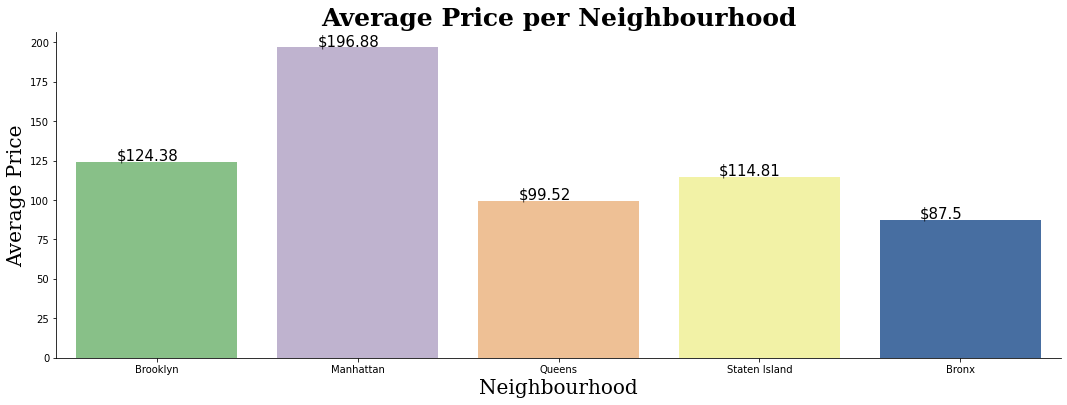

In [18]:
# Create bar graph for average price per neighbourhood
fig, ax = plt.subplots(1,1, figsize=(18, 6))

sns.barplot(x='Neighbourhood', y='Avg_Price', data=df, ax=ax, palette='Accent').set_title('Average Price per Neighbourhood', fontdict={'family':'serif', 'size':25, 'weight':'bold'})

for i in range(len(ax.get_xticklabels())):
    x = ax.get_xticklabels()[i].get_text()
    #print(x)
    val = float(df.Avg_Price[df.Neighbourhood==x].tolist()[0])
    plt.text(i-0.2, val+1, '$' + str(round(val,2)), fontsize=15, rotation=0)
    
sns.despine()

ax.set_ylabel('Average Price', fontdict={'family':'serif', 'fontsize':20})
ax.set_xlabel('Neighbourhood', fontdict={'family':'serif', 'fontsize':20})

In [19]:
newyork_price_average = round(newyork.price.mean(), 2)
print('The average price of an AirBnB listing in New York is ${}'.format(newyork_price_average))

The average price of an AirBnB listing in New York is $152.72


### What is the average price per neighbourhood in New York City?
In New York City, the average price of an AirBnB listing is $141.31. A host may want to list a location in Manhattan if they are looking to charge the most they can. However, if a renter is on a budget, they may want too book something in the Bronx. 

In [20]:
# Create pivot table room type - price in each neighbourhood

price_neighbourhood_by_room_type = pd.pivot_table(newyork, index = ['neighbourhood_group','room_type'], values = 'price', aggfunc = 'mean').reset_index() 
display(price_neighbourhood_by_room_type)

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


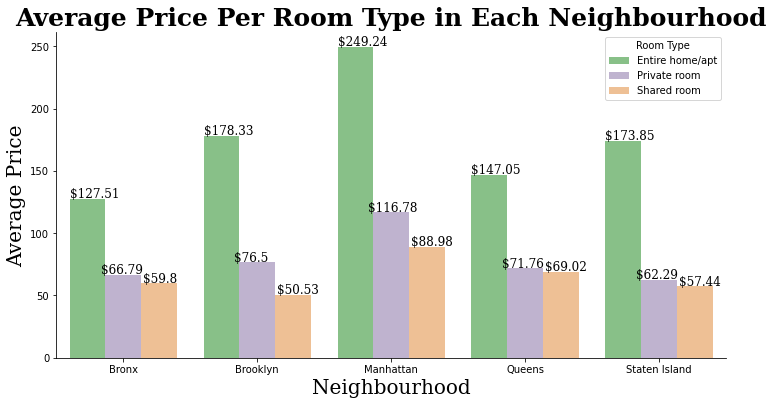

In [21]:
# Create barplot for average price per room type in each neighbourhood

fig, ax = plt.subplots(1,1,figsize=(12,6))

sns.barplot(x='neighbourhood_group', 
            y='price', 
            hue='room_type', 
            data=price_neighbourhood_by_room_type, 
            palette='Accent').set_title('Average Price Per Room Type in Each Neighbourhood', fontdict={'family':'serif', 'size':25, 'weight':'bold'})

sns.despine()

for i in range(len(ax.get_xticklabels())):
    name = ax.get_xticklabels()[i].get_text()
    val1 = float(price_neighbourhood_by_room_type.price[(price_neighbourhood_by_room_type.neighbourhood_group==name) & (price_neighbourhood_by_room_type.room_type=='Entire home/apt')])
    ax.text(i-0.40, val1+1, '$' + str(round(val1,2)), fontdict={'family':'serif', 'size':12})
    
    val2 = float(price_neighbourhood_by_room_type.price[(price_neighbourhood_by_room_type.neighbourhood_group==name) & (price_neighbourhood_by_room_type.room_type=='Private room')])
    ax.text(i-0.17, val2+1, '$' + str(round(val2,2)), fontdict={'family':'serif', 'size':12})
    
    val3 = float(price_neighbourhood_by_room_type.price[(price_neighbourhood_by_room_type.neighbourhood_group==name) & (price_neighbourhood_by_room_type.room_type=='Shared room')])
    ax.text(i+0.15, val3+1, '$' + str(round(val3,2)), fontdict={'family':'serif', 'size':12})
    

ax.set_ylabel('Average Price', fontdict={'family':'serif', 'fontsize':20})
ax.set_xlabel('Neighbourhood', fontdict={'family':'serif', 'fontsize':20})

legend= plt.legend(title='Room Type')

### What is the average price per room type in each neighbourhood?
    - If we break down each room type per neighbourhood, an entire home or apartment is still the most expensive in all five neighbourhoods. Hosts in all five neighbourhoods, may want to list their entire home or apartment if they have the ability to in order to maximize the amount that they charge. 
    - If a renter on a budget wants to book an entire home or apartment, they might want to look at booking in the Bronx.
    - If the same renter wants to save the most money, they may want to book a shared room in Brooklyn.

# Which Neighborhood/City Had Highest Availability

In [22]:
avail_by_group = newyork.groupby('neighbourhood_group').agg({'availability_365':['mean', 'min', 'max']})
avail_by_group

availability_365         
                                mean min  max
neighbourhood_group                          
Bronx                     165.758937   0  365
Brooklyn                  100.232292   0  365
Manhattan                 111.979410   0  365
Queens                    144.451818   0  365
Staten Island             199.678284   0  365

In [23]:
avail_by_neighbourhood = newyork.groupby('neighbourhood').agg({'availability_365':['mean', 'min', 'max']})
avail_by_neighbourhood

availability_365         
                            mean min  max
neighbourhood                            
Allerton              163.666667   0  364
Arden Heights          94.250000   0  316
Arrochar              255.809524  12  362
Arverne               188.428571   0  364
Astoria               109.191111   0  365
...                          ...  ..  ...
Windsor Terrace        81.885350   0  353
Woodhaven             200.920455   0  365
Woodlawn               98.272727   0  309
Woodrow                 0.000000   0    0
Woodside              130.217021   0  365

[221 rows x 3 columns]

In [24]:
# How many room types are listed in each neighbourhood
num_rooms = newyork.groupby(['neighbourhood_group', 'room_type']).size().reset_index()
num_rooms.rename(columns={0:'number_of_rooms'}, inplace=True)
display(num_rooms)


,neighbourhood_group,room_type,number_of_rooms
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


Text(0.5, 0, 'Neighbourhood')

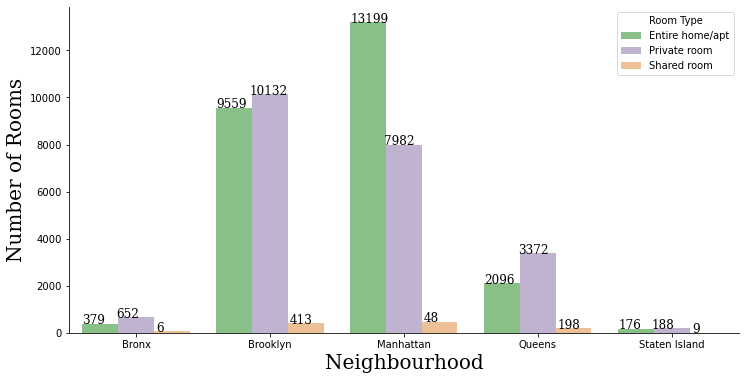

In [25]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.barplot(x='neighbourhood_group', y='number_of_rooms', hue='room_type', data=num_rooms, palette='Accent')


for i in range(len(ax.get_xticklabels())):
    name = ax.get_xticklabels()[i].get_text()
    
    val1 = float(num_rooms.number_of_rooms[(num_rooms.neighbourhood_group==name) & (num_rooms.room_type=='Entire home/apt')])
    ax.text(i-0.40, val1+0.75, str(val1).strip('.0'), fontdict={'family':'serif', 'size':12})
    
    val2 = float(num_rooms.number_of_rooms[(num_rooms.neighbourhood_group==name) & (num_rooms.room_type=='Private room')])
    ax.text(i-0.15, val2+0.75, str(val2).strip('.0'), fontdict={'family':'serif', 'size':12})
    
    val3 = float(num_rooms.number_of_rooms[(num_rooms.neighbourhood_group==name) & (num_rooms.room_type=='Shared room')])
    ax.text(i+0.15, val3+0.75, str(val3).strip('.0'), fontdict={'family':'serif', 'size':12}, rotation=0)

legend= plt.legend(title='Room Type')


sns.despine()

ax.set_ylabel('Number of Rooms', fontdict={'family':'serif', 'fontsize':20})
ax.set_xlabel('Neighbourhood', fontdict={'family':'serif', 'fontsize':20})

# What is the average price of each room type?

In [26]:
avg_price_type = newyork.groupby('room_type').agg({'price':['mean', 'min', 'max']})
#avg_price_type = newyork.groupby('room_type').agg({'price': 'mean'})
avg_price_type = avg_price_type.reset_index()
avg_price_type.columns = ['Room Type', 'Mean', 'Min', ' Max']

avg_price_type['Mean'] = round(avg_price_type['Mean'],2)
avg_price_type['Mean'].dtype
avg_price_type

,Room Type,Mean,Min,Max
0,Entire home/apt,211.79,0,10000
1,Private room,89.78,0,10000
2,Shared room,70.13,0,1800


Text(0.5, 0, 'Room Type')

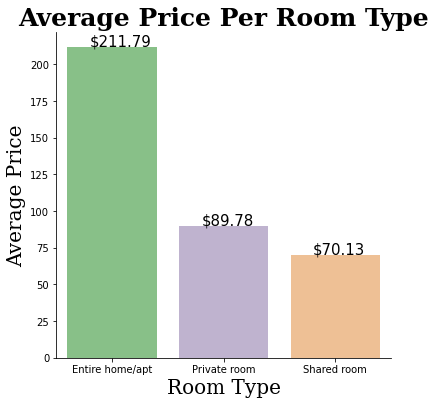

In [27]:
# Create bar graph for average price per room type
fig, ax = plt.subplots(1,1, figsize=(6, 6))

sns.barplot(x='Room Type', y='Mean', data=avg_price_type, ax=ax, palette='Accent').set_title('Average Price Per Room Type', fontdict={'family':'serif', 'size':25, 'weight':'bold'})

for i in range(len(ax.get_xticklabels())):
    x = ax.get_xticklabels()[i].get_text()
    val = float(avg_price_type['Mean'][avg_price_type['Room Type']==x].tolist()[0])
    plt.text(i-0.2, val+1, '$' + str(round(val,2)), fontsize=15, rotation=0)
    
sns.despine()

ax.set_ylabel('Average Price', fontdict={'family':'serif', 'fontsize':20})
ax.set_xlabel('Room Type', fontdict={'family':'serif', 'fontsize':20})

### What is the average price per room type?
    - On avearge, an entire home or appartment in New York City is more expensive than the other room types

In [28]:
multi_index = pd.pivot_table(df, index = ['Neighbourhood'], values = 'Avg_Price', aggfunc = 'sum') 
print(multi_index)

               Avg_Price
Neighbourhood           
Bronx              87.50
Brooklyn          124.38
Manhattan         196.88
Queens             99.52
Staten Island     114.81


# Reviews Breakdown By Room Type

In [29]:
reviews_by_type = newyork.groupby('room_type').agg({'number_of_reviews':['mean', 'sum', 'size','min', 'max']})
reviews_by_type = reviews_by_type.reset_index()
reviews_by_type.columns = ['Room Type', 'Average Number of Reviews', 'Total_num_reviews', 'Size', 'Min', ' Max']
reviews_by_type

,Room Type,Average Number of Reviews,Total_num_reviews,Size,Min,Max
0,Entire home/apt,22.842418,580403,25409,0,488
1,Private room,24.112962,538346,22326,0,629
2,Shared room,16.600000,19256,1160,0,454


Text(0.5, 0, 'Room Type')

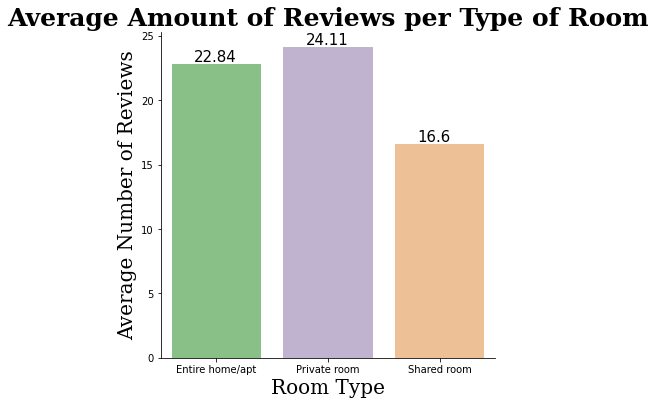

In [30]:
# bar plot for average amount of reviews per type of room
fig, ax = plt.subplots(1,1, figsize=(6, 6))

sns.barplot(x='Room Type', 
            y='Average Number of Reviews', 
            data=reviews_by_type, ax=ax, palette='Accent').set_title('Average Amount of Reviews per Type of Room', fontdict={'family':'serif', 'size':25, 'weight':'bold'} )

for i in range(len(ax.get_xticklabels())):
    x = ax.get_xticklabels()[i].get_text()
    val = float(reviews_by_type['Average Number of Reviews'][reviews_by_type['Room Type']==x].tolist()[0])
    plt.text(i-0.2, val+0.2, str(round(val,2)), fontsize=15, rotation=0)

sns.despine()

ax.set_ylabel('Average Number of Reviews', fontdict={'family':'serif', 'fontsize':20})
ax.set_xlabel('Room Type', fontdict={'family':'serif', 'fontsize':20})


On average, private rooms receive more reviews closely followed by entire home/apartments

# Reviews Breakdown By Neighbourhood

In [31]:
# Calculate mean number of reviews per neighbourhood

reviews_by_neighbourhood = newyork.groupby('neighbourhood_group').agg({'number_of_reviews':['mean', 'min', 'max']})
reviews_by_neighbourhood = reviews_by_neighbourhood.reset_index()
reviews_by_neighbourhood.columns = ['Neighbourhood', 'Average Number of Reviews', 'Min', ' Max']

reviews_by_neighbourhood

,Neighbourhood,Average Number of Reviews,Min,Max
0,Bronx,26.004583,0,321
1,Brooklyn,24.202845,0,488
2,Manhattan,20.985596,0,607
3,Queens,27.700318,0,629
4,Staten Island,30.941019,0,333


Text(0.5, 0, 'Neighbourhood')

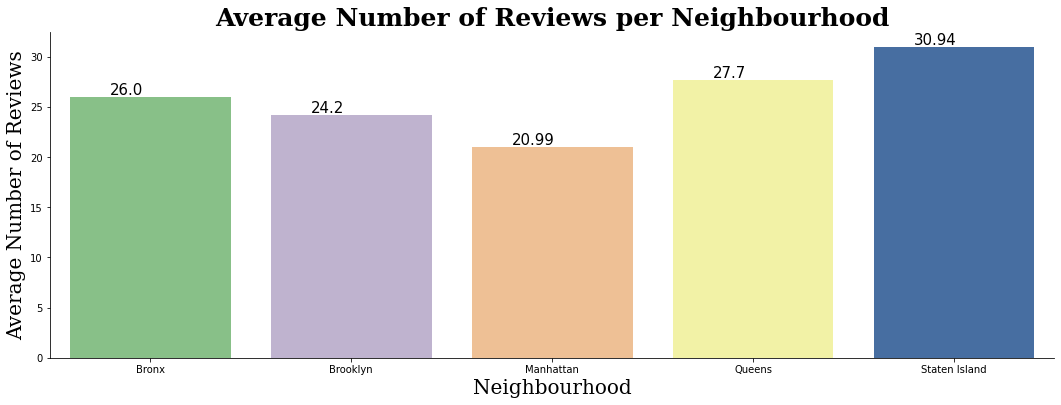

In [32]:
# Barplot for average number of reviews per neighbourhood
fig, ax = plt.subplots(1,1, figsize=(18, 6))

sns.barplot(x='Neighbourhood', 
            y='Average Number of Reviews', 
            data=reviews_by_neighbourhood, 
            ax=ax, palette='Accent').set_title('Average Number of Reviews per Neighbourhood', fontdict={'family':'serif', 'size':25, 'weight':'bold'})

for i in range(len(ax.get_xticklabels())):
    x = ax.get_xticklabels()[i].get_text()
    val = float(reviews_by_neighbourhood['Average Number of Reviews'][reviews_by_neighbourhood['Neighbourhood']==x].tolist()[0])
    plt.text(i-0.2, val+0.25, str(round(val,2)), fontsize=15, rotation=0)


sns.despine()

ax.set_ylabel('Average Number of Reviews', fontdict={'family':'serif', 'fontsize':20})
ax.set_xlabel('Neighbourhood', fontdict={'family':'serif', 'fontsize':20})

In [33]:
# Create pivot table room type - number of reviews in each neighbourhood
reviews_neighbourhood_by_room_type = pd.pivot_table(newyork, index = ['neighbourhood_group','room_type'], values = 'number_of_reviews', aggfunc = 'mean').reset_index() 
display(reviews_neighbourhood_by_room_type)


,neighbourhood_group,room_type,number_of_reviews
0,Bronx,Entire home/apt,30.678100
1,Bronx,Private room,25.018405
2,Bronx,Shared room,7.200000
3,Brooklyn,Entire home/apt,27.945183
4,Brooklyn,Private room,21.086952
5,Brooklyn,Shared room,14.026634
6,Manhattan,Entire home/apt,17.815516
7,Manhattan,Private room,26.202706
8,Manhattan,Shared room,21.400000
9,Queens,Entire home/apt,28.933206


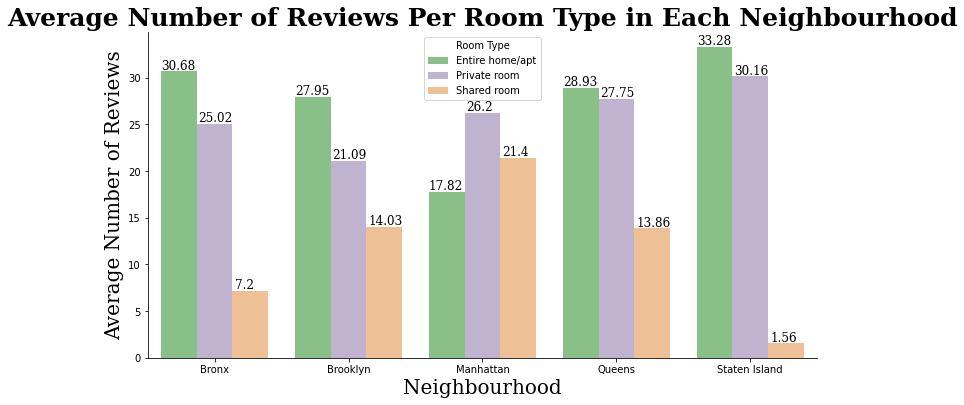

In [34]:
# Create barplot for average number of reviews per room type in each neighbourhood

fig, ax = plt.subplots(1,1,figsize=(12,6))

sns.barplot(x='neighbourhood_group',
            y='number_of_reviews', 
            hue='room_type', 
            data=reviews_neighbourhood_by_room_type, 
            palette='Accent').set_title('Average Number of Reviews Per Room Type in Each Neighbourhood', fontdict={'family':'serif', 'size':25, 'weight':'bold'})

sns.despine()

ax.set_ylabel('Average Number of Reviews', fontdict={'family':'serif', 'fontsize':20})
ax.set_xlabel('Neighbourhood', fontdict={'family':'serif', 'fontsize':20})



for i in range(len(ax.get_xticklabels())):
    name = ax.get_xticklabels()[i].get_text()

    val1 = float(reviews_neighbourhood_by_room_type.number_of_reviews[(reviews_neighbourhood_by_room_type.neighbourhood_group==name) & (reviews_neighbourhood_by_room_type.room_type=='Entire home/apt')])
    ax.text(i-0.40, val1+0.25, str(round(val1,2)), fontdict={'family':'serif', 'size':12})
    
    val2 = float(reviews_neighbourhood_by_room_type.number_of_reviews[(reviews_neighbourhood_by_room_type.neighbourhood_group==name) & (reviews_neighbourhood_by_room_type.room_type=='Private room')])
    ax.text(i-0.12, val2+0.25, str(round(val2,2)), fontdict={'family':'serif', 'size':12})
    
    val3 = float(reviews_neighbourhood_by_room_type.number_of_reviews[(reviews_neighbourhood_by_room_type.neighbourhood_group==name) & (reviews_neighbourhood_by_room_type.room_type=='Shared room')])
    ax.text(i+0.15, val3+0.25, str(round(val3,2)), fontdict={'family':'serif', 'size':12})


legend= plt.legend(title='Room Type')



### What is the average amount of reviews per type of room in each neighbourhood?
    - It is interesting to note that an entire home or apartment in Manhattan is the most expensive and it also receives the least amount of reviews on average

# Most Frequently Used Words In Listing Titles

           Frequency
Word                
room            9391
bedroom         7231
private         6985
apartment       6113
cozy            4635
studio          3772
brooklyn        3629
apt             3571
spacious        3387
1               3357
2               3079
east            2967
manhattan       2855
&               2822
park            2632


Text(0.5, 1.0, 'Most Frequently Used Words in Listing Titles')

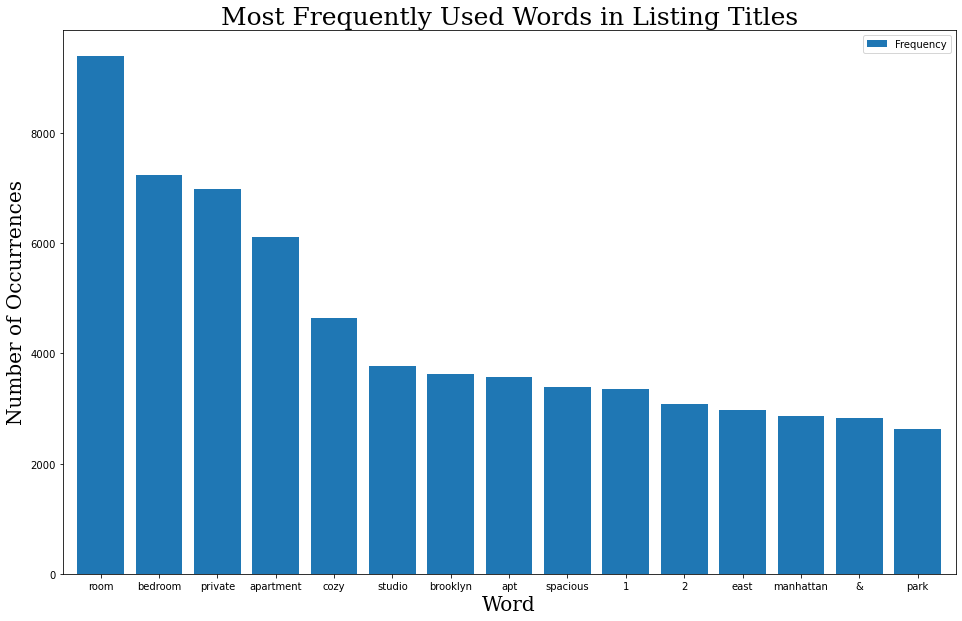

In [35]:
from collections import Counter

top_N = 15

df = pd.read_csv('AB_NYC_2019.csv',
                 usecols=['name'])

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df.name
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
ax =rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

ax.set_ylabel('Number of Occurrences', fontdict={'family':'serif', 'fontsize':20})
ax.set_xlabel('Word', fontdict={'family':'serif', 'fontsize':20})
ax.set_title('Most Frequently Used Words in Listing Titles', fontdict={'family':'serif', 'fontsize':25})

### What words appear the most in listing titles?
    - The top four words that appear in the listing titles are"room", "bedroom", "private", and "apartment"; these describe what type the listing is.

# Scatter Plot Between Price And Number Of Reviews

Text(0.5, 1.0, 'Price and # of Reviews')

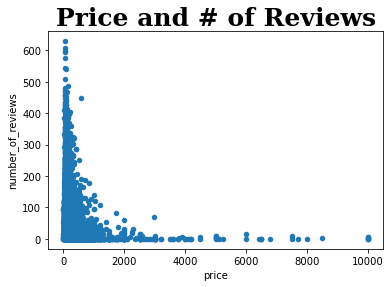

In [36]:
newyork.plot.scatter(x = 'price', y = 'number_of_reviews'). set_title('Price and # of Reviews', fontdict={'family':'serif', 'size':25, 'weight':'bold'})



# Price Distribution

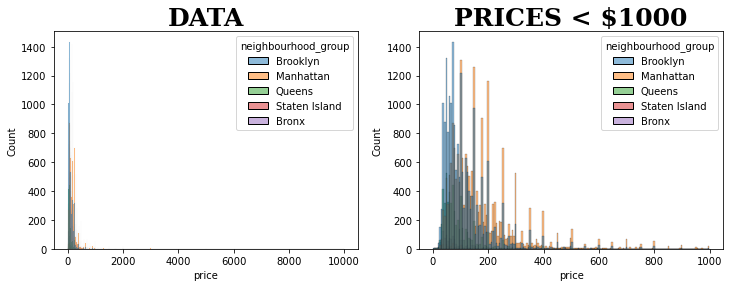

In [37]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,4))

sns.histplot(newyork, x='price', hue='neighbourhood_group', ax=ax1).set_title('DATA', fontdict={'family':'serif', 'size':25, 'weight':'bold'})
sns.histplot(newyork.loc[newyork['price'] < 1000], x='price', hue='neighbourhood_group', ax=ax2).set_title('PRICES < $1000', fontdict={'family':'serif', 'size':25, 'weight':'bold'});

# Scatter Plot Differentiated By Neighbourhood Group

Text(0.5, 0, 'Longitude')

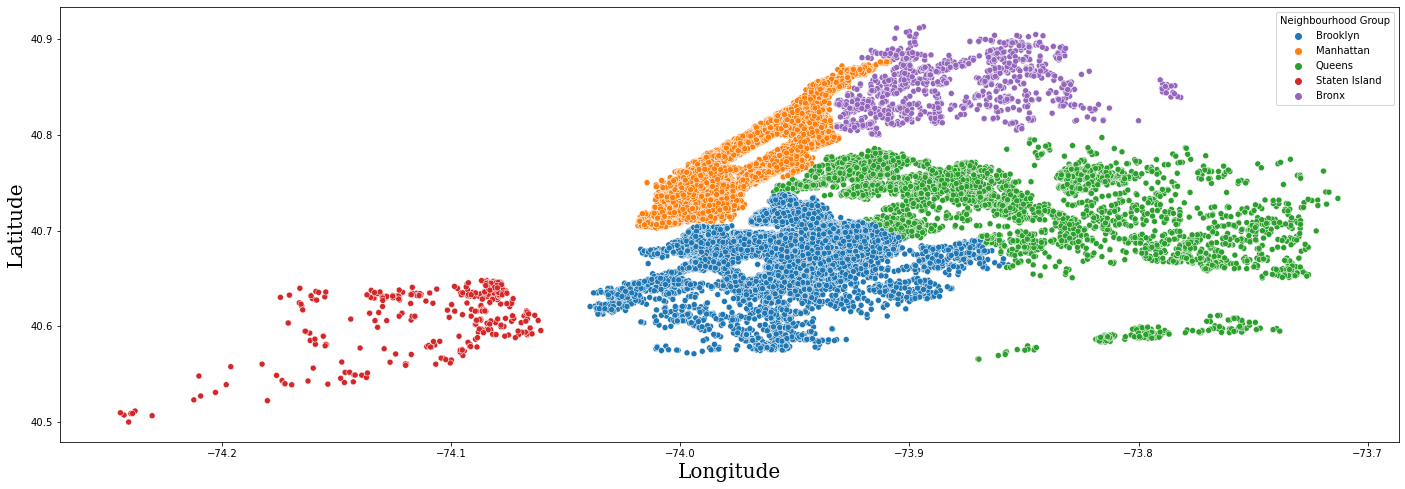

In [38]:
plt.figure(figsize=(24, 8))
neighbourhood_scatter = sns.scatterplot(x=newyork.longitude,y=newyork.latitude,hue=newyork.neighbourhood_group)

legend= plt.legend(title='Neighbourhood Group')
neighbourhood_scatter.set_ylabel('Latitude', fontdict={'family':'serif', 'fontsize':20})
neighbourhood_scatter.set_xlabel('Longitude', fontdict={'family':'serif', 'fontsize':20})

# Scatter Plot Differentiated By Room Type

Text(0.5, 0, 'Longitude')

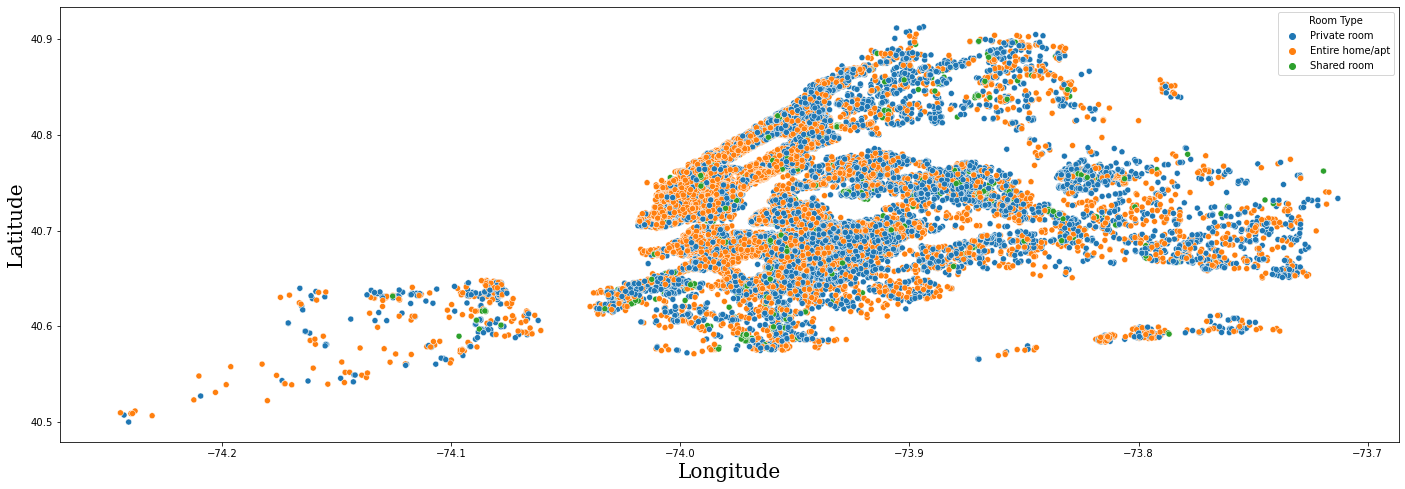

In [39]:
plt.figure(figsize=(24, 8))
room_type_scatter = sns.scatterplot(x=newyork.longitude,y=newyork.latitude,hue=newyork.room_type)

legend= plt.legend(title='Room Type')
room_type_scatter.set_ylabel('Latitude', fontdict={'family':'serif', 'fontsize':20})
room_type_scatter.set_xlabel('Longitude', fontdict={'family':'serif', 'fontsize':20})

# Density Of Minimum Nights

/Users/taseer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


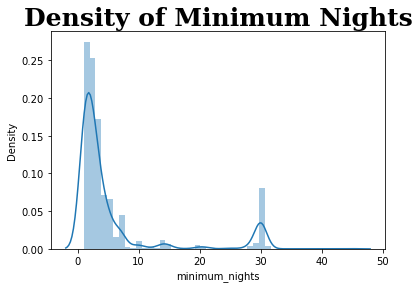

In [40]:
sns.distplot(newyork[(newyork['minimum_nights'] <= 45) & (newyork['minimum_nights'] > 0)]['minimum_nights'], bins=46).set_title('Density of Minimum Nights', fontdict={'family':'serif', 'size':25, 'weight':'bold'})
plt.ioff()

# Histogram Of Listings With Prices Below $600

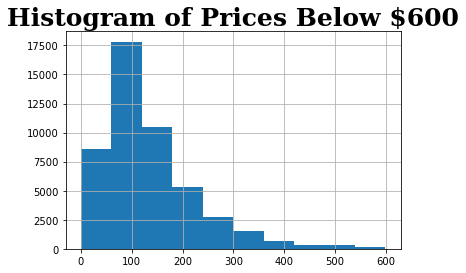

In [41]:
prices_histogram=newyork["price"][newyork["price"]<600].hist().set_title('Histogram of Prices Below $600', fontdict={'family':'serif', 'size':25, 'weight':'bold'})

# Visualization using Kepler

In [49]:
from keplergl import KeplerGl
heatmap = KeplerGl(height=600, data={"data_1": newyork})
heatmap

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':              id                                               name   host_id  \
0    …

# Regression Analysis
What influences booking for a listing?

1. Restriction of minimum nights set by host?
2. The number of reviews the host has recieved?
3. Availability of apartment throughout the year?
4. The price for the apartment?

**Relationship between mimimum nights vs bookings**

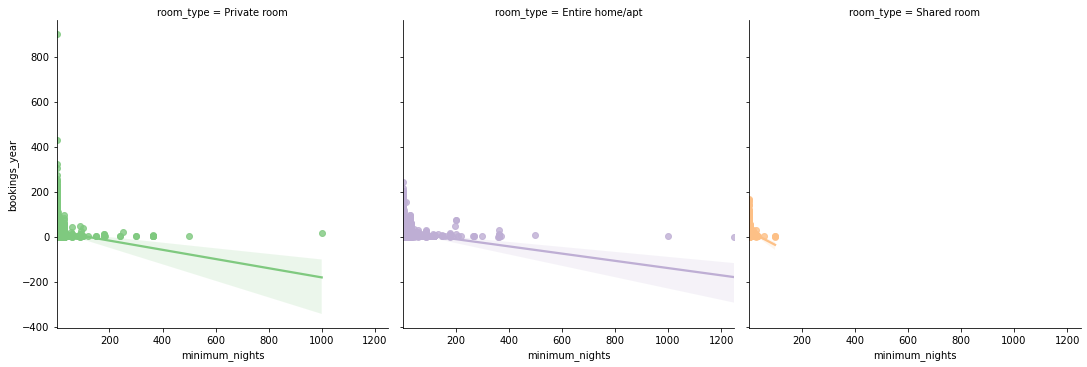

In [43]:

price_reviews = sns.lmplot(x='minimum_nights', 
                           y='bookings_year', 
                           hue='room_type', 
                           col='room_type',
                           data=newyork, 
                           height=5, 
                           palette='Accent')


**Do bookings increase as price increase?**

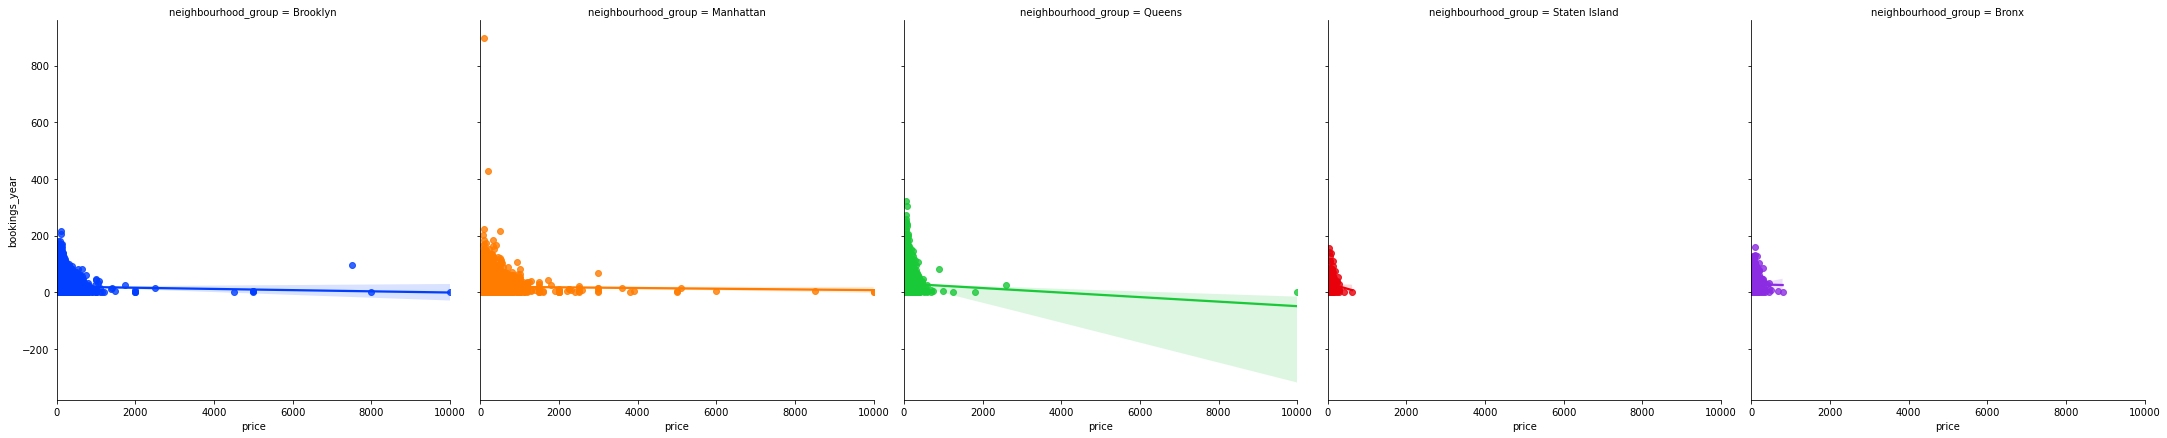

In [44]:
sns.lmplot(x='price', y='bookings_year', hue='neighbourhood_group', col='neighbourhood_group',data=newyork, height=6, palette='bright')

**With the increase in number of reviews, do bookings also increase?**

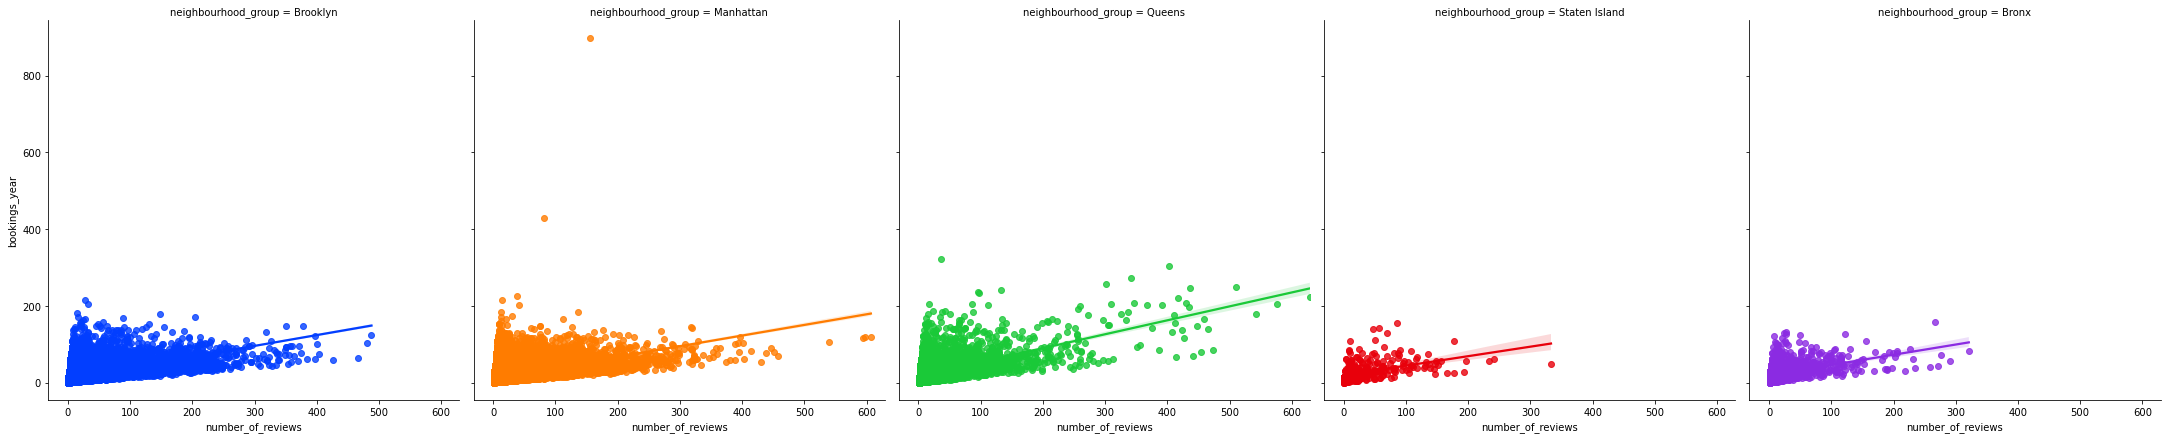

In [45]:
sns.lmplot(x='number_of_reviews', y='bookings_year', hue='neighbourhood_group', col='neighbourhood_group',data=newyork, height=6, palette='bright')

**Does availability of a listing has an imapct on the number of bookings?**

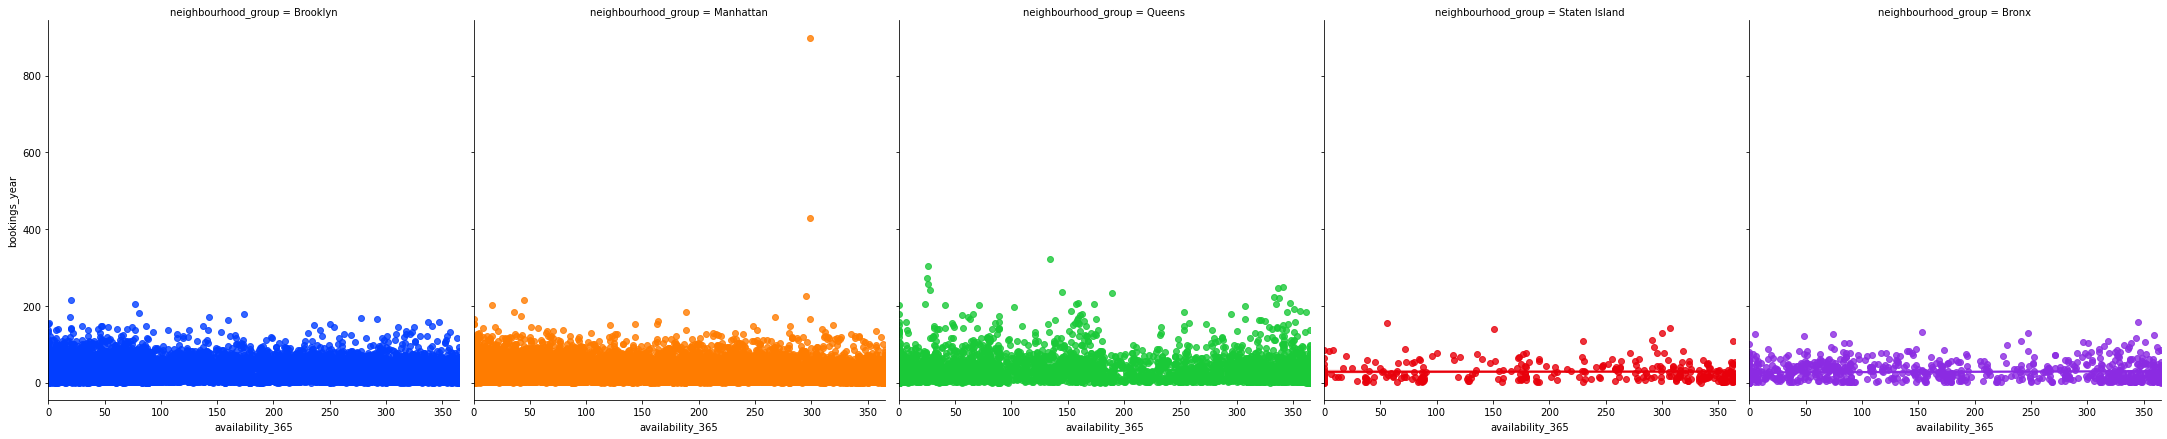

In [46]:
sns.lmplot(x='availability_365', y='bookings_year', hue='neighbourhood_group', col='neighbourhood_group',data=newyork, height=6, palette='bright')

# Removing outliers

In [47]:
newyork.drop(newyork[newyork['price'] > 1000].index, inplace=True)
newyork.drop(newyork[newyork['bookings_year'] > 200].index, inplace=True)
newyork.drop(newyork[newyork['minimum_nights'] > 200].index, inplace=True)

# Finding regression coefficient and intercept

In [48]:
#ny = newyork.sample(frac=0.20, replace=True, random_state=1)
#if we use a 20% sample than we use this in regression analysis
newyork.fillna({'bookings_year': 0}, inplace=True)

# Data — Bookings vs Price
x1=pd.Series(newyork['price'])
y1=pd.Series(newyork['bookings_year'])
X1 = x1[:,np.newaxis] # manipulating shape
 
# Data — Bookings vs Number of Reviews
x2=pd.Series(newyork['number_of_reviews'])
y2=pd.Series(newyork['bookings_year'])
X2 = x2[:,np.newaxis] # manipulate shape

# Data — Bookings vs Availability
x3=pd.Series(newyork['availability_365'])
y3=pd.Series(newyork['bookings_year'])
X3 = x3[:,np.newaxis] # manipulate shape

# Data — Bookings vs Minimum_nights
x4=pd.Series(newyork['minimum_nights'])
y4=pd.Series(newyork['bookings_year'])
X4 = x4[:,np.newaxis] # manipulate shape

from sklearn.linear_model import LinearRegression
model1 = LinearRegression(fit_intercept=True)
model2 = LinearRegression(fit_intercept=True)
model3 = LinearRegression(fit_intercept=True)
model4 = LinearRegression(fit_intercept=True)

model1.fit(X1,y1)
print('Price vs Bookings: Coefficient: ', model1.coef_, ' Intercept:', model1.intercept_)

model2.fit(X2,y2)
print('Reviews vs Bookings: Coefficient: ', model2.coef_, ' Intercept:', model2.intercept_)

model3.fit(X3,y3)
print('Availability vs Bookings: Coefficient: ', model3.coef_, ' Intercept:', model3.intercept_)

model4.fit(X4,y4)
print('Minimum Nights vs Bookings: Coefficient: ', model4.coef_, ' Intercept:', model4.intercept_)


Price vs Bookings: Coefficient:  [-0.0112419]  Intercept: 18.286330635710634
Reviews vs Bookings: Coefficient:  [0.31764954]  Intercept: 9.308805090017508
Availability vs Bookings: Coefficient:  [0.03067596]  Intercept: 13.253899855612332
Minimum Nights vs Bookings: Coefficient:  [-0.36755827]  Intercept: 19.06600072369793


<ipython-input-48-244c870246a2>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X1 = x1[:,np.newaxis] # manipulating shape
<ipython-input-48-244c870246a2>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X2 = x2[:,np.newaxis] # manipulate shape
<ipython-input-48-244c870246a2>:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X3 = x3[:,np.newaxis] # manipulate shape
<ipython-input-48-244c870246a2>:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead

# Conclusion

What influences booking for a listing?

1. Restriction of minimum nights set by host?
There is a weak negative (-0.367) correlation between minimum nights against the bookings. 
When minimum numbers of nights set by host increases, the bookings decrease. 
2. The number of reviews the host has recieved?
There is a weak positive (+0.318) correlation between the number of reviews the listing has recieved and numbers of times it is booked. These is a hint of indiaction that with more number of reviews, more likely it is for the listing to get booked.
3. Availability of apartment throughout the year?
Surprisingly, there is almost no linear correlation (0.03) between the availability of the apartent throughout the year and number of bookings.
4. The price for the apartment?
Again, the correlation between price and number of bookings is almost negligible (-0.01). Removing the outliers might have had an effect here as there also a few bookings that go upto $10,000 a night.